In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

#classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('drive/MyDrive/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.tail(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target_names"] = df["output"].map({0:"yes",1:"no"})
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,target_names
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,no
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,no
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,no
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,no
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,no


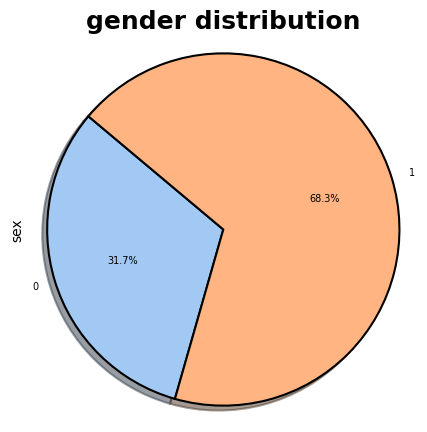

In [23]:
plt.figure(figsize=(5,5))
palette_color = sns.color_palette("pastel")
explode = [0 for _ in range(df["sex"].nunique())]  # sex sütunundaki benzer değerleri bulur

target_counts = df.groupby("sex")["sex"].count()

target_counts.plot.pie(
    colors=palette_color,
    explode = explode, # dilimin dışarı çıkmasını sağlar
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={"fontsize":7},
    wedgeprops={"linewidth":1.5,"edgecolor":"black"},
)

plt.title("gender distribution", fontsize=18, weight="bold")
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'trtbps')

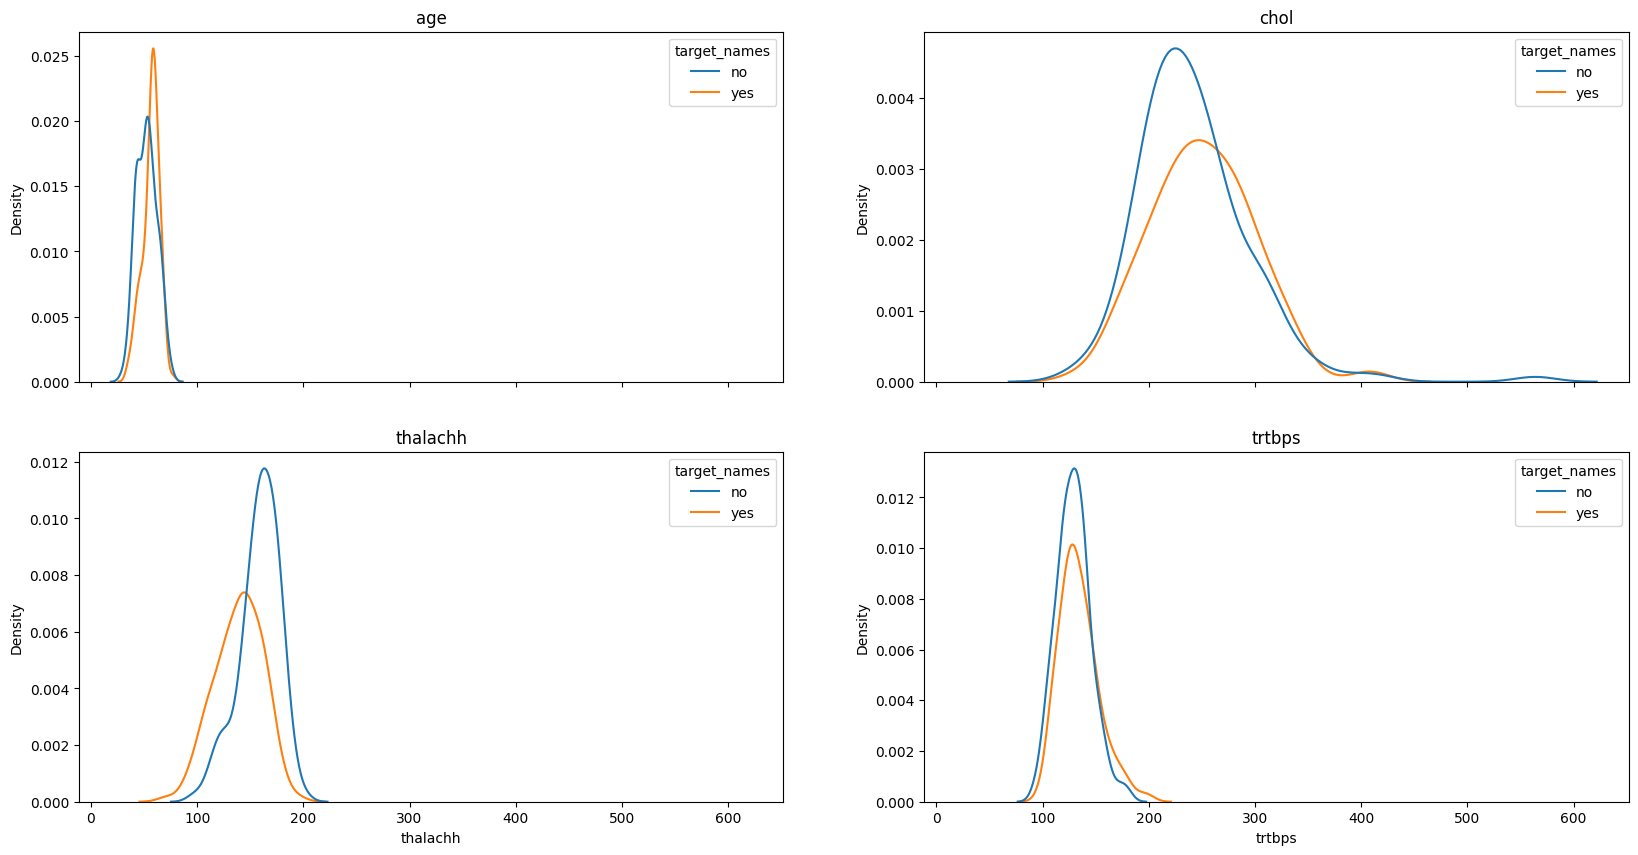

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10))

sns.kdeplot(data=df, x="age", hue="target_names", ax=axes[0,0])
axes[0,0].set_title("age")

sns.kdeplot(data=df, x="chol", hue="target_names", ax=axes[0,1])
axes[0,1].set_title("chol")

sns.kdeplot(data=df, x="thalachh", hue="target_names", ax=axes[1,0])
axes[1,0].set_title("thalachh")

sns.kdeplot(data=df, x="trtbps", hue="target_names", ax=axes[1,1])
axes[1,1].set_title("trtbps")


In [25]:
x = df.drop(columns=["output", "target_names"])
y = df["output"] #hedef değişkendir(bağımlı değişkendir). yani modelin tahmin etmeye çalıştığı değişkendir.

In [27]:
# SMOTEENN dengesiz veri setlerini dengelemek için kullanılan teknik bir kombinasyondur.
# SMOTE küçük veri setine sentetik veri ekleyerek aşırı örnekleme yapar
# ENN aşırı örneklenmiş veri setindeki hatalı veya gürültülü gözlemleri silmek için komşu temelli bir filtreleme yapar.

smoteenn = SMOTEENN()
x_new, y_new = smoteenn.fit_resample(x,y)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 0)
# random_state = 0 olmasının sebebi her çalıştırmada aynı eğitim ve test setini kullanmaktır.
# eğer ki random_state belirtilmezse her seferinde farklı eğitim ve test verilerini kullanmak zorunda kalırız.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 13)
(19, 13)
(72,)
(19,)


In [33]:
scaler = StandardScaler() # verileri standartlaştırmak için kullanılır. normalizasyon işlemi de denir.
# normalizasyon işlemi her bir sütunu kendi ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürür.


x_train_scaled = scaler.fit_transform(x_train)  # yapmazsak olmaz birşey
x_test_scaled = scaler.fit_transform(x_test)

normalizasyonun avantajları:
1.   farklı özelliklerin(sütunların) farklı ölçeklerde olması algoritmaların doğru çalışmasını engelleyebilir. bu işlem benzer ölçekte olmasını sağlar.
2.   optimizasyon algoritmalarında standartlaşmış veriler daha hızlı yakınsama sağlanır. böylece model daha hızlı bir şekilde öğrenir
3.   bazı algoritmalar verilerin dağılımı üzerine hassas olabilir. normalizasyon işlemi modelin performansını artırabilir.



In [39]:
models = {  # iki tane makine öğrenimi modelini tercih ettik ve bunların anahtarlarını verdik.
    'RF' : RandomForestClassifier(),
    'SVM': SVC()
}

result = {}  # sonuçları burada saklayacağız

for name, model in models.items():  # models sözlüğündeki her model için döngü başlatır. name =  modelin adı (RF,SVM)
# model o modele karşılık gelen model nesnesi (randomforestclassifier veya svc)
    model.fit(x_train_scaled, y_train) #  her model için eğitim verileri eğitilir
    y_pred = model.predict(x_test_scaled) # test verisi (x_test_scaled) kullanılarak modelin tahminleri yapılır ve bu tahminler y_pred değişkenine kaydedilir.

    accuracy = accuracy_score(y_test, y_pred) # modelin doğrulu hesaplanır. accuracy modelin ne kadar doğru yaptığını belirtir.

    result[name]={ # result sözlüğünün içerisine modellerin doğruluk değerlerini tabloladık
        'Accuracy':accuracy
    }

result_df = pd.DataFrame(result).T  # sonuçları pandas DataFrame'e dönüştürür. result sözlüğünü dataframe'e dönüştürür.

result_df

,Accuracy
RF,0.894737
SVM,0.894737
